<a href="https://colab.research.google.com/github/Gail529/Mental-health/blob/main/tweet_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install afinn

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53452 sha256=ea1b4eb9f5aa2ceec47e917389fa9f266b6ac3f6d5542ae8cb485a7cb5f40d2f
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [2]:
!pip install vaderSentiment


     |████████████████████████████████| 133kB 5.4MB/s 


In [3]:
import pandas as pd 
import numpy as np
from tqdm import tqdm_notebook as tqdm 
from tqdm import trange
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
emo_lex=pd.read_excel('/content/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx') # emotion lexicon 

In [5]:
emo_lex.head(5)

,English (en),Afrikaans (af),Albanian (sq),Amharic (am),Arabic (ar),Armenian (hy),Azeerbaijani (az),Basque (eu),Belarusian (be),Bengali (bn),Bosnian (bs),Bulgarian (bg),Catalan (ca),Cebuano (ceb),Chinese (Simplified) (zh-CN),Chinese (Traditional) (zh-TW),Corsican (co),Croatian (hr),Czech (cs),Danish (da),Dutch (nl),English (en).1,Esperanto (eo),Estonian (et),Finnish (fi),French (fr),Frisian (fy),Galician (gl),Georgian (ka),German (de),Greek (el),Gujarati (gu),Haitian Creole (ht),Hausa (ha),Hawaiian (haw),Hebrew (iw),Hindi (hi),Hmong (hmn),Hungarian (hu),Icelandic (is),...,Russian (ru),Samoan (sm),Scots Gaelic (gd),Serbian (sr),Sesotho (st),Shona (sn),Sindhi (sd),Sinhala (Sinhalese) (si),Slovak (sk),Slovenian (sl),Somali (so),Spanish (es),Sundanese (su),Swahili (sw),Swedish (sv),Tagalog (Filipino) (tl),Tajik (tg),Tamil (ta),Telugu (te),Thai (th),Turkish (tr),Ukrainian (uk),Urdu (ur),Uzbek (uz),Vietnamese (vi),Welsh (cy),Xhosa (xh),Yiddish (yi),Yoruba (yo),Zulu (zu),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,পশ্চাতে,aback,изненадан,sorpresa,aback,吓了一跳,嚇了一跳,aback,po krmi,překvapení,overrasket,verrast,aback,abako,kummitus,taaksepäin,abasourdi,ôfbrekke,aback,aback,zurück,προς τα πίσω,અચાનક,aback,aback,a hope,נבוך,अचंभे,aback,hátra,óvart,...,сзади,o se mea e leai,s an Iar-,абацк,back,aback,بي پناهه,අවාසනාවන්ත මෙන්ය,prekvapený,Nadaljuj,aback,detrás,aback,tamaa,en rygg,aback,бесабаб нест,அதிர்ச்சி,వెనక్కి,ผงะ,pupada,огидно,aback,shafqatsiz,buồn,aback,ukuphazamiseka,אַבאַק,aback,back,0,0,0,0,0,0,0,0,0,0
1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,গণনা-যন্ত্রবিশেষ,abakus,Абак,àbac,abako,算盘,算盤,abacus,računaljka,počitadlo,abacus,telraam,abacus,abako,abacus,abacus,abaque,abacus,ábaco,აბაკუსი,Abakus,άβακας,એબાસ,abacus,ƙaura,ke kumu,אַבַּקוּס,अबेकस,abacus,golyós számológép,abacus,...,счеты,faʻailoga,abacus,абакус,abacus,abacus,عباسي,අවපීඩනය,počítadlo,abakus,abacus,ábaco,abacus,Abacus,kulram,abako,abacus,அபாகஸ்,అబాకస్,ลูกคิด,abaküs,абак,abacus,abakus,bàn tính,abacus,abacus,אַבאַקוס,abacus,Abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,বর্জিত করা,napuštanje,изоставят,abandonar,biyaan,放弃,放棄,abbandunà,napustiti,opustit,opgive,in de steek laten,abandon,forlasi,loobuma,luopua,abandonner,fergees,abandonar,უარი თქე,verlassen,εγκαταλείπω,છોડી દો,abandone,watsi,haʻalele,לִנְטוֹשׁ,छोड़ देना,tso tseg,elhagyott,yfirgefa,...,отказаться от,lafoaia,thrèig,напустити,tlohela,siya,کلون,අතහැර දමන්න,opustiť,opusti,iska dhaaf,abandonar,ninggalkeun,kuacha,överge,abandunahin,тарк кунед,கைவிட,పరిత్యజించిన,ละทิ้ง,terketmek,відмовитися,چھوڑ دو,tark eting,từ bỏ,gadael,ukushiya,פאַרלאָזן,kọ silẹ,shiya,0,1,0,0,0,1,0,1,0,0
3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,পরিত্যক্ত,napušteno,изоставен,abandonat,gibiyaan,弃,棄,abbandunata,napušten,opuštěný,forladt,verlaten,abandoned,forlasita,mahajäetud,hylätty,abandonné,ferlitten,abandonado,მიტოვებული,verlassen,εγκαταλειμμένος,ત્યજી,abandone,watsi,haʻaleleʻia,נָטוּשׁ,त्यागा हुआ,tso tseg,elhagyatott,yfirgefinn,...,заброшенный,tuulafoaiina,thrèigte,напуштен,e tlohetsoe,asiyiwa,ڇڏيو ويو,අත්හැර දමා ඇත,opustený,opuščeni,ka tagay,abandonado,ditinggalkeun,kutelekezwa,övergiven,inabandunang,партофташуда,கைவிடப்பட்ட,రద్దు,ถูกปล่อยปละละเลย,terkedilmiş,покинутий,ترک کر دیا,tark etildi,bị bỏ rơi,wedi'u gadael,lahliwe,פארלאזן,abandoned,ishiyiwe,0,1,1,0,0,1,0,1,0,0
4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,বিসর্জন,napuštanje,изоставяне,abandó,abandonment,放弃,放棄,abbandunamentu,napuštanje,opuštění,opgivelse,verlatenheid,abandonment,forlaso,loobumine,hylkääminen,abandon,ferplichting,abandono,მიტოვება,Aufgabe,εγκατάλειψη,પરિત્યાગ,abandon,watsi,ka haʻalele,נְטִישָׁה,संन्यास,kev nrauj,lemondás,yfirgefa,...,оставление,lafoaia,thrèigsinn,напуштање,ho lahla,kusiya,ڇڏيل,අත්හැර දැම

In [6]:
emolex_df=emo_lex[['English (en)','Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']]
emotions=emolex_df.columns.drop('English (en)')
emolex_df.rename(columns={'English (en)':'word'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
del data["neutrality"]

In [10]:
tweets=pd.read_csv('/content/final_tweets2.csv')

In [12]:
emolex_df.head(2)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1


In [13]:
tweets.head(2)


,Unnamed: 0,user,location,text,tweets
0,0,AmirahStyles_,"Las Vegas , NV",I love my family. I love my life. \nHappiness.,i love my family i love my life happiness
1,1,seejhay_,I couldn't care less,"""HoMOSexUal wILl nOT iNhEriT tHE kiNGdom Of gO...",homosexual will not inherit the kingdom of go...


In [14]:
del tweets['Unnamed: 0']


In [15]:
def tweet_emotion(tweet_df,col):
  new_tweet_df=tweet_df.copy()
  #new  dataframe that will store the emotion scores
  emo_df=pd.DataFrame(0,index=new_tweet_df.index, columns=emotions)
  lemmatizer=WordNetLemmatizer()

  
  with tqdm(total=len(list(new_tweet_df.iterrows()))) as pbar:
    for i ,row in new_tweet_df.iterrows(): 
        pbar.update(1) #update the progress bar
        tweet=word_tokenize(new_tweet_df.loc[i][col]) #the body of text for each individual tweet(row)

        for word in tweet:
            new=lemmatizer.lemmatize(word)#lemmatizing the words
            emo_score=emolex_df[emolex_df.word == new]     
            if not emo_score.empty:
                for emotion in list(emotions):
                    emo_df.at[i,emotion] += emo_score[emotion]


    new_tweet_df=pd.concat([new_tweet_df,emo_df] ,axis=1)
    return new_tweet_df

In [ ]:
# splitting dataframe by row index 
tweet_df_1 = tweets.iloc[:1000,:] 
tweet_df_1

In [17]:
final_df=tweet_emotion(tweet_df_1,'tweets')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [18]:
final_df.describe()

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,3.056000,0.265000,0.129000,1.656000,0.103000,0.229000,2.58300,0.163000,0.455000,1.630000
std,1.776519,0.610859,0.390527,1.290476,0.332418,0.488669,1.65404,0.476086,0.703185,1.331493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.00000,0.000000,0.000000,1.000000
75%,4.000000,0.000000,0.000000,2.250000,0.000000,0.000000,4.00000,0.000000,1.000000,3.000000
max,10.000000,5.000000,3.000000,8.000000,3.000000,4.000000,9.00000,4.000000,5.000000,7.000000


In [19]:
tweet_df_2 = tweets.iloc[1001:,:] 


In [20]:
final_df_2=tweet_emotion(tweet_df_2,'tweets')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [21]:
final_df_2.describe()

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.546460,1.597345,0.477876,0.533186,0.146018,0.672566,0.196903,1.284292,0.118363,0.383850
std,0.760347,1.152509,0.666853,0.708284,0.394769,0.888639,0.459851,0.941205,0.349553,0.641672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
max,5.000000,6.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,2.000000,4.000000


In [23]:
tweet_emotions_df2=final_df.append(final_df_2, ignore_index=True, sort=False)

In [24]:
tweet_emotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user          1904 non-null   object
 1   location      1375 non-null   object
 2   text          1904 non-null   object
 3   tweets        1904 non-null   object
 4   Positive      1904 non-null   int64 
 5   Negative      1904 non-null   int64 
 6   Anger         1904 non-null   int64 
 7   Anticipation  1904 non-null   int64 
 8   Disgust       1904 non-null   int64 
 9   Fear          1904 non-null   int64 
 10  Joy           1904 non-null   int64 
 11  Sadness       1904 non-null   int64 
 12  Surprise      1904 non-null   int64 
 13  Trust         1904 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 208.4+ KB


In [25]:
tweet_emotions_df.to_csv('tweet_emotion_scores2.csv')

In [26]:
data=pd.read_csv('/content/tweet_emotion_scores2.csv')

In [27]:
data.head()

,Unnamed: 0,user,location,text,tweets,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,AmirahStyles_,"Las Vegas , NV",I love my family. I love my life. \nHappiness.,i love my family i love my life happiness,3,0,0,1,0,0,3,0,0,0
1,1,seejhay_,I couldn't care less,"""HoMOSexUal wILl nOT iNhEriT tHE kiNGdom Of gO...",homosexual will not inherit the kingdom of go...,1,0,0,1,0,1,1,0,1,1
2,2,AKpuresoul,NaN,We r here to shower our unconditional love \nN...,we r here to shower our unconditional love n w...,1,0,0,0,0,0,1,0,0,0
3,3,_itspjmluv,방탄소년단 ‹3,you are and always be my happiness and my fami...,you are and always be my happiness and my fami...,2,0,0,1,0,0,2,0,0,0
4,4,Smile57383709,NaN,Praying the Almighty God showers you with good...,praying the almighty god shower you with good ...,8,0,0,6,0,1,6,0,1,4


In [28]:
del data['Unnamed: 0']
del data['user']
del data['location']
del data['text']
data.head()

,tweets,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,i love my family i love my life happiness,3,0,0,1,0,0,3,0,0,0
1,homosexual will not inherit the kingdom of go...,1,0,0,1,0,1,1,0,1,1
2,we r here to shower our unconditional love n w...,1,0,0,0,0,0,1,0,0,0
3,you are and always be my happiness and my fami...,2,0,0,1,0,0,2,0,0,0
4,praying the almighty god shower you with good ...,8,0,0,6,0,1,6,0,1,4


In [29]:
tweets=data['tweets'].values
print(len(tweets))
from afinn import Afinn
afinn = Afinn(language='en')
data['afinn_score'] = data['tweets'].apply(afinn.score)
data['afinn_score'].describe()


1904


count    1904.000000
mean        3.226366
std         5.541865
min       -17.000000
25%        -0.250000
50%         2.000000
75%         7.000000
max        20.000000
Name: afinn_score, dtype: float64

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sia = SentimentIntensityAnalyzer() 

vader_negative=[]
vader_positive=[]
vader_neutral=[]

for tweet in tweets:  
    sentiment_dict = sia.polarity_scores(tweet)
    vader_negative.append(sentiment_dict['neg'])
    vader_positive.append(sentiment_dict['pos'])
    vader_neutral.append(sentiment_dict['neu'])
 

In [40]:
data['positive_vader']=vader_positive
data['negative_vader']=vader_negative
data['neutral_vader']=vader_neutral
data.head(2)

,tweets,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,afinn_score,positive_vader,negative_vader,neutral_vader,emotion_score,labels
0,i love my family i love my life happiness,3,0,0,1,0,0,3,0,0,0,9.0,0.667,0.0,0.333,0.059540,1
1,homosexual will not inherit the kingdom of go...,1,0,0,1,0,1,1,0,1,1,1.0,0.104,0.0,0.896,0.071237,1


In [41]:
import numpy as np 
# Original array 
array = np.arange(5) 
print(array) 

weights = np.arange(10, 15) 
print(weights) 

# Weighted average of the given array 
res1 = np.average(array, weights=weights) 
print(res1) 

np.dot(array,weights)

[0 1 2 3 4]
[10 11 12 13 14]
2.1666666666666665


130

In [47]:
from numpy import average

weight_list=[1,5,24.28,5.71,15,9.28,0.71,39.28,3.57,2.14,1,1,5,2.5]
weight_list= [float(item) for item in weight_list]


avg_emotions=[]
for s in range(len(tweets)):
    song=data.iloc[s,1:15].values
    final_val = np.dot(song,weight_list)
    avg_emotions.append(final_val)

data['depression_score']=avg_emotions
data['depression_score'].describe()


count    1904.000000
mean       63.106308
std        55.414191
min        -1.132500
25%        24.183125
50%        47.982500
75%        88.028375
max       376.292500
Name: depression_score, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['emotion_score']])
data['emotion_score']=scaled
data['emotion_score'].describe()


count    1904.000000
mean        0.271053
std         0.153578
min         0.000000
25%         0.150024
50%         0.224851
75%         0.368202
max         1.000000
Name: emotion_score, dtype: float64

In [ ]:
emotion_scores=data['emotion_score'].values
emo_labels=[]
for x in range(len(emotion_scores)):
    score = emotion_scores[x]
    if score <= 0.2:
        label="1"
    elif score <= 0.4:
        label="2"
    elif score <= 0.6:
        label="3"
    elif score <= 0.8:
        label="4"
    else:
        label ="5"
    
    emo_labels.append(label)

data['labels']=emo_labels
data['labels'].describe()


count     1999
unique       5
top          1
freq      1231
Name: labels, dtype: object

In [ ]:
import pandas as pd
MH_data=pd.read_csv('/content/Mental_health.csv')

In [37]:
emotion_scores=data['emotion_score'].values
emo_labels_2=[]
for x in range(len(emotion_scores)):
    score = emotion_scores[x]
    if score <= 0.5:
        label = 1
    else:
        label = 2
    
    emo_labels_2.append(label)

data['labels']=emo_labels_2
data['labels'].describe()


count    1904.000000
mean        1.032038
std         0.176147
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: labels, dtype: float64

,tweets,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,afinn_score,positive_vader,negative_vader,neutral_vader,emotion_score,labels
0,i love my family i love my life happiness,3,0,0,1,0,0,3,0,0,0,9.0,0.667,0.0,0.333,0.059540,1
1,homosexual will not inherit the kingdom of go...,1,0,0,1,0,1,1,0,1,1,1.0,0.104,0.0,0.896,0.071237,1


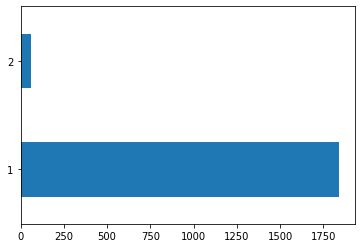

In [39]:
data['labels'].value_counts().plot(kind='barh')
data.head(2)


In [ ]:
data.to_csv('Mental_health.csv')